In [1]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [2]:
!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Luxury_Beauty.json.gz

--2023-08-28 14:48:19--  https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Luxury_Beauty.json.gz
Resolving datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)... 132.239.8.30
Connecting to datarepo.eng.ucsd.edu (datarepo.eng.ucsd.edu)|132.239.8.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73193215 (70M) [application/x-gzip]
Saving to: ‘Luxury_Beauty.json.gz’

Luxury_Beauty.json. 100%[===================>]  69.80M  31.0MB/s    in 2.3s    

2023-08-28 14:48:22 (31.0 MB/s) - ‘Luxury_Beauty.json.gz’ saved [73193215/73193215]



In [3]:
### load the meta data

data_values = []
with gzip.open('Luxury_Beauty.json.gz') as f:
    for l in f:
        data_values.append(json.loads(l.strip()))

# total length of list, this number equals total number of products
print(len(data_values))

# first row of the list
print(data_values[0])

574628
{'overall': 2.0, 'vote': '3', 'verified': True, 'reviewTime': '06 15, 2010', 'reviewerID': 'A1Q6MUU0B2ZDQG', 'asin': 'B00004U9V2', 'reviewerName': 'D. Poston', 'reviewText': "I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.", 'summary': "dispensers don't work", 'unixReviewTime': 1276560000}


In [4]:
data = pd.DataFrame.from_dict(data_values)

In [5]:
data.head().T

,0,1,2,3,4
overall,2.0,5.0,5.0,5.0,5.0
vote,3,14,NaN,NaN,NaN
verified,True,True,True,True,True
reviewTime,"06 15, 2010","01 7, 2010","04 18, 2018","04 18, 2018","04 17, 2018"
reviewerID,A1Q6MUU0B2ZDQG,A3HO2SQDCZIE9S,A2EM03F99X3RJZ,A3Z74TDRGD0HU,A2UXFNW9RTL4VM
asin,B00004U9V2,B00004U9V2,B00004U9V2,B00004U9V2,B00004U9V2
reviewerName,D. Poston,chandra,Maureen G,Terry K,Patricia Wood
reviewText,"I bought two of these 8.5 fl oz hand cream, an...","Believe me, over the years I have tried many, ...",Great hand lotion,This is the best for the severely dry skin on ...,The best non- oily hand cream ever. It heals o...
summary,dispensers don't work,Best hand cream ever.,Five Stars,Five Stars,I always have a backup ready.
unixReviewTime,1276560000,1262822400,1524009600,1524009600,1523923200


In [6]:
data.dropna(subset=['overall','reviewText'], inplace=True)
k_col = ['overall', 'reviewText']
data = data[k_col]

In [7]:
data.head()

,overall,reviewText
0,2.0,"I bought two of these 8.5 fl oz hand cream, an..."
1,5.0,"Believe me, over the years I have tried many, ..."
2,5.0,Great hand lotion
3,5.0,This is the best for the severely dry skin on ...
4,5.0,The best non- oily hand cream ever. It heals o...


In [8]:
# full_df = pd.DataFrame.from_dict(data)
# full_df = pd.DataFrame(full_df[['overall','reviewText']])

In [9]:
# Sólo muestras con una puntuación válida:
df = data[data['overall'].isin([1, 2, 4, 5])]

# Nº de muestras asumible:
num_samples = 10000

# Genero varios df, para cada valoración tomo 10000 muestras aleatorias con sample:
# NOTA: La puntuación de 3 estrellas no la considero, ya que estoy buscando reviews que sean positivas y negativas, el "punto neutro" no me aporta
sampled_df_1 = df[df['overall'] == 1].sample(n=num_samples, random_state=0)
sampled_df_2 = df[df['overall'] == 2].sample(n=num_samples, random_state=0)
sampled_df_4 = df[df['overall'] == 4].sample(n=num_samples, random_state=0)
sampled_df_5 = df[df['overall'] == 5].sample(n=num_samples, random_state=0)

# Concateno df en un único y definitivo Dataframe para trabajar:
df = pd.concat([sampled_df_1, sampled_df_2, sampled_df_4, sampled_df_5])
df.reset_index(drop=True, inplace=True)

In [10]:
df.head(5)

,overall,reviewText
0,1.0,Mixed with water. I use the real rusk shampoo ...
1,1.0,I have used plumpers before and I can tell you...
2,1.0,The brush is splayed out so i can't really use...
3,1.0,"This soap is awful, it arrived leaking in its ..."
4,1.0,does not work


In [11]:
df.tail(5)

,overall,reviewText
39995,5.0,Best shaving cream ever
39996,5.0,Ok
39997,5.0,"Shave with these terrific blades, or, grow a b..."
39998,5.0,This makes your skin into baby skin smooth eve...
39999,5.0,Love it!


In [12]:
print(len(df))

40000


Distribución de reviews por número de estrellas:

In [13]:
df['overall'].value_counts()

1.0    10000
2.0    10000
4.0    10000
5.0    10000
Name: overall, dtype: int64

Como he "forzado", con la selección aleatoria previa, a tener 10000 reviews por cada puntuación, no tiene tanta gracia el sacar esta distribución.

❗❗ **El enfoque que nos piden del problema es el de una clasificación binaria supervisada**

Así que, lo primero que tengo que hacer en este punto es transformar la puntuación de mis reviews (1, 2, 4 y 5 ⭐) en binario:

In [14]:
# review negativa (1,2) = 0
# review positiva (4,5) = 1

def label_sentiment(row):
    if int(row['overall']) > 3:
        return 1
    else:
        return 0

Creo una nueva columna en la que se ponga el valor en binario del sentimiento (0 negativo, 1 positivo)

In [15]:
df['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)

Chequeo que la creación de esta columna haya ido bien:

In [16]:
df.head()

,overall,reviewText,sentiment_label
0,1.0,Mixed with water. I use the real rusk shampoo ...,0
1,1.0,I have used plumpers before and I can tell you...,0
2,1.0,The brush is splayed out so i can't really use...,0
3,1.0,"This soap is awful, it arrived leaking in its ...",0
4,1.0,does not work,0


In [17]:
df['sentiment_label'].value_counts()

0    20000
1    20000
Name: sentiment_label, dtype: int64

In [18]:
# Creo un df sólo con el cuerpo de texto de las reseñas
review = df['reviewText']

In [19]:
# Chequeo que ha ido bien
review.head()

0    Mixed with water. I use the real rusk shampoo ...
1    I have used plumpers before and I can tell you...
2    The brush is splayed out so i can't really use...
3    This soap is awful, it arrived leaking in its ...
4                                        does not work
Name: reviewText, dtype: object

Con la tokenización es posible obtener la cardinalidad (nº de palabras distintas) de mi vocabulario.

Tokenizamos los textos de las reviews de forma sencilla: simplemente convirtiendo todo a minúsculas y separando los tokens por espacios. Es un método muy simple pero válido para la etapa en la que estamos: exploración del Corpus

In [20]:
splitted_reviews = df['reviewText'].str.lower().str.split()

In [21]:
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

In [22]:
from collections import Counter # Para contar los tokens
vocabulary_ = Counter(words)

In [23]:
len(vocabulary_)

59394

La cardinalidad del vocabulario de nuestras reviews es **59394 palabras**

## Vista la cardinalidad del vocabulario, voy a pintar los n-gramas (conjuntos de palabras adyacentes en un texto) más comunes en mi conjunto de reviews:

Importamos las librerías necesarias:

In [24]:
# !pip uninstall numpy

In [25]:
!pip install numpy
!pip install nltk

In [26]:
# from sklearn.feature_extraction.text import CountVectorizer
from nltk import ngrams
from nltk.probability import FreqDist

### Bi-gramas:

In [27]:
bigrams_ = ngrams(words, 2)

### Tri-gramas:

In [28]:
trigrams_ = ngrams(words, 3)

Mostramos las frecuencias de aparición de estos n-gramas a lo largo del Corpus:

In [29]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

### Muestro los 10 bigramas más comunes:

In [30]:
bg_freq.most_common(10)

[(('i', 'have'), 7841),
 (('this', 'product'), 5161),
 (('my', 'hair'), 5161),
 (('it', 'is'), 5076),
 (('of', 'the'), 4700),
 (('this', 'is'), 4385),
 (('in', 'the'), 4103),
 (('and', 'i'), 3785),
 (('and', 'it'), 3694),
 (('i', 'was'), 3677)]

### Y los 10 trigramas más frecuentes:

In [31]:
tg_freq.most_common(10)

[(('this', 'is', 'a'), 1140),
 (('a', 'lot', 'of'), 837),
 (('i', 'love', 'this'), 779),
 (('i', 'have', 'been'), 766),
 (('this', 'is', 'the'), 754),
 (('i', 'bought', 'this'), 723),
 (('this', 'product', 'is'), 704),
 (('it', 'is', 'a'), 691),
 (('i', 'have', 'used'), 688),
 (('i', 'love', 'the'), 656)]

## Vamos a pintar las nubes de palabras de estas reseñas

In [32]:
# Importamos librerías necesarias:

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

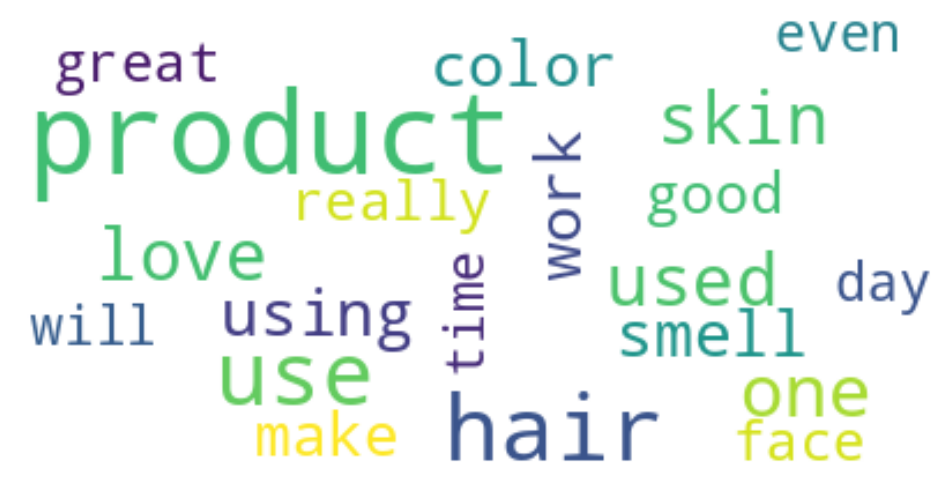

In [34]:
plot_word_cloud(words)

## Voy a implementar un algoritmo de *Word Embedding (Word2Vec)* para ver las palabras más similares a una dada de mi Corpus.

In [35]:
# Importamos librerías:
!pip install --upgrade gensim #Forzar a tener la última versión de gensim porque sino el build_vocab no funciona
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 26.3 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [36]:
# Otras librerías que son útiles:

import re  # Para Preprocesamiento
import pandas as pd

import spacy  # Para prepocesamiento
import logging  # Configuración de loggings para monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from gensim.models.phrases import Phrases, Phraser

Es útil ver cuántos procesadores tiene nuestra máquina de Colab:

In [37]:
import multiprocessing

In [38]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

2


Definimos los parámetros de nuestro modelo Word2Vec:

In [39]:
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.03,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

Word2Vec requiere construir una tabla de vocabulario del Corpus, esto se hace con la función `build_vocab`que necesita como input una lista de listas, donde cada sublista contiene las palabras de una oración (en nuestro caso, review):

In [40]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
sentences = [word_tokenize(row) for row in df['reviewText']]

Compruebo que *sentences* está bien construida:

In [42]:
print(sentences[0])
print(sentences[50])

['Mixed', 'with', 'water', '.', 'I', 'use', 'the', 'real', 'rusk', 'shampoo', 'every', 'week', '.', 'This', 'IS', 'NOT', 'THE', 'SAME', '!', '!', '!', '!']
['I', "'m", 'sure', 'this', 'would', 'be', 'great', 'fresh', 'but', 'the', 'tube', 'I', 'received', 'was', 'already', 'past', 'expiration', 'and', 'do', "n't", 'want', 'to', 'put', 'it', 'anywhere', 'near', 'my', 'eyes', '.', ':', '-/']


Ahora ya lanzo la función para construir la Tabla de vocabulario:

In [43]:
w2v_model.build_vocab(sentences, progress_per=10000)



---



Y con esta tabla de vocabulario, entrenamos el modelo Word2Vec para nuestro Corpus:

In [44]:
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=5, report_delay=1)

(3215371, 10521645)

Guardo el modelo:

In [45]:
w2v_model.save('./w2v_model.pkl')



---



Y ahora vamos a probar qué tal funciona el modelo con algunas palabras del corpus. Voy a escoger palabras de entre las más frecuentes que se mostraron arriba en el *word-cloud* y también otras que creo que son importantes en el Corpus sobre productos de belleza (por ejemplo *cream*):

In [46]:
w2v_model.wv.most_similar(positive=["cream"])

[('shaving', 0.8823087215423584),
 ('cleanser', 0.8702712655067444),
 ('cleansing', 0.865111231803894),
 ('moisturizer', 0.8649374842643738),
 ('lotion', 0.8636388182640076),
 ('shave', 0.8626864552497864),
 ('facial', 0.8617968559265137),
 ('mask', 0.8458911180496216),
 ('soap', 0.8429951667785645),
 ('serum', 0.842233419418335)]

In [47]:
w2v_model.wv.most_similar(positive=["skin"])

[('combination', 0.8837637901306152),
 ('oily', 0.873009979724884),
 ('prone', 0.8672004342079163),
 ('irritate', 0.8439119458198547),
 ('smoother', 0.8422021269798279),
 ('helped', 0.8413012623786926),
 ('caused', 0.8407874703407288),
 ('sensitive', 0.8402523994445801),
 ('pores', 0.8352196216583252),
 ('irritated', 0.8285845518112183)]

In [48]:
w2v_model.wv.most_similar(positive=["hair"])

[('straight', 0.915046215057373),
 ('curly', 0.9035511016845703),
 ('frizzy', 0.9023206830024719),
 ('wavy', 0.8924898505210876),
 ('naturally', 0.8802559971809387),
 ('frizz', 0.879330039024353),
 ('shoulder', 0.8677845001220703),
 ('straighten', 0.8560150861740112),
 ('coarse', 0.8496744632720947),
 ('style', 0.8485032320022583)]

In [49]:
w2v_model.wv.most_similar(positive=["face"])

[('hands', 0.9119539260864258),
 ('neck', 0.8766865730285645),
 ('itchy', 0.8720401525497437),
 ('legs', 0.8648434281349182),
 ('irritated', 0.8640697598457336),
 ('scalp', 0.859161913394928),
 ('washing', 0.858281135559082),
 ('itching', 0.8527050614356995),
 ('moisturized', 0.851489245891571),
 ('burning', 0.8492928147315979)]

In [50]:
w2v_model.wv.most_similar(positive=["pink"])

[('purple', 0.9622361063957214),
 ('blue', 0.9509255886077881),
 ('orange', 0.9373671412467957),
 ('tint', 0.9368037581443787),
 ('bright', 0.933323860168457),
 ('shade', 0.9314773678779602),
 ('green', 0.9302400350570679),
 ('shimmer', 0.9299559593200684),
 ('yellow', 0.9232656359672546),
 ('beautiful', 0.9107400178909302)]

### Visualización en 2 dimensiones de algunos word embeddings calculados con Word2Vec


Creo clusters de palabras con las más similares a unas dadas, basándome en el modelo Word2Vec que generé anteriormente

In [51]:
# Cargo el modelo
w2v_beauty = Word2Vec.load('./w2v_model.pkl')

In [52]:
from sklearn.manifold import TSNE
import numpy as np

Aquí también escojo 4 palabras de las que aparecieron en el *WordCloud* y añado *expensive* simplemente por ver qué tal se relaciona con otros embeddings:

In [53]:
keys = ['product','hair','smell', 'expensive']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_beauty.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_beauty.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [54]:
print(word_clusters)

[['satisfied', 'unhappy', 'upset', 'sad', 'performance', 'particular', 'impressed', 'batch', 'thrilled', 'skeptical'], ['straight', 'curly', 'frizzy', 'wavy', 'naturally', 'frizz', 'shoulder', 'straighten', 'coarse', 'style'], ['scent', 'smells', 'overpowering', 'fragrance', 'pleasant', 'strong', 'overwhelming', 'odor', 'perfume', 'awful'], ['pricey', 'reasonable', 'cheaper', 'value', 'cost', 'price', 'considering', 'worth', 'decent', 'better']]


Reducimos dimensionalidad a 2D para poder representar

In [55]:
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)

In [56]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape

In [57]:
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

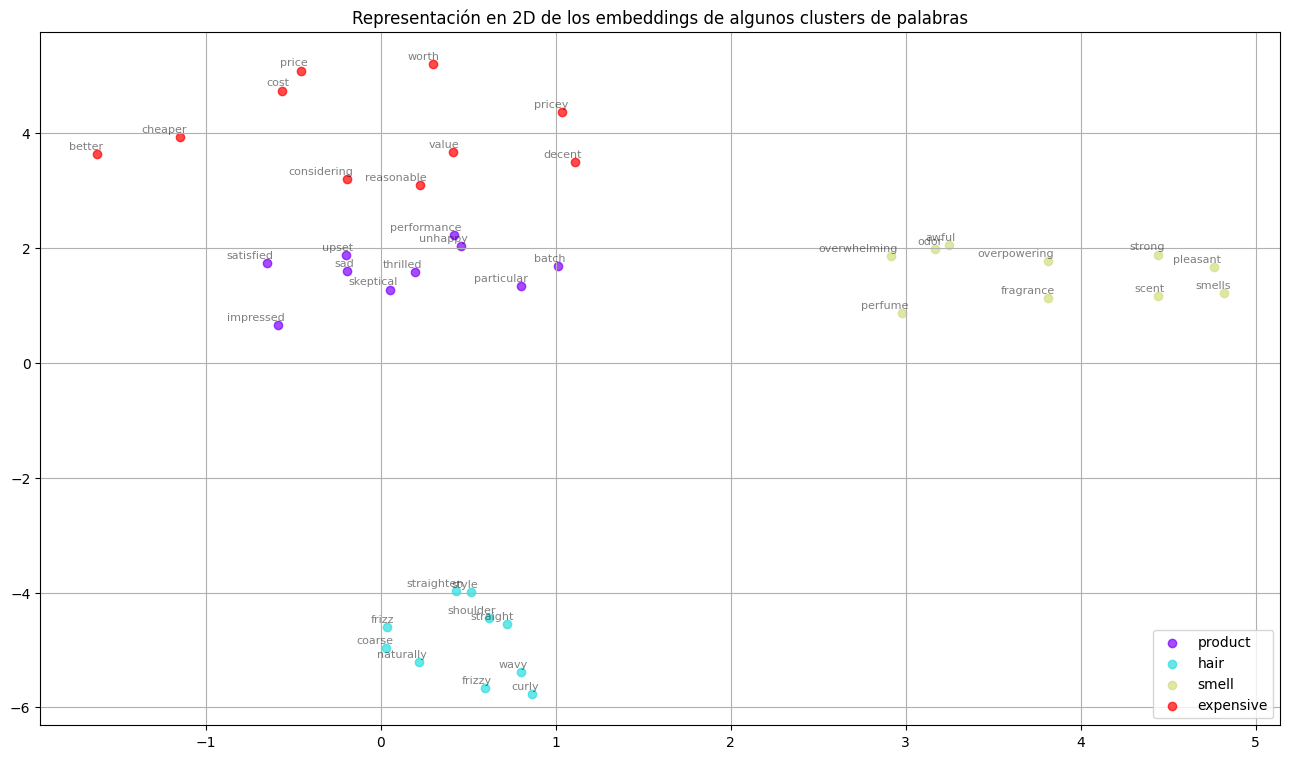

In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.title('Representación en 2D de los embeddings de algunos clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

## Conclusiones de la Exploración:

#### 1) Los bi-gramas y tri-gramas nos muestran que las combinaciones más comunes de tokens son, sobre todo, artículos (the, a, ...), pronombres personales (I, i...) y palabras que podemos considerar como stop-words (and, this, is...)


#### 2) La tokenización que hemos hecho ha sido muy básica: sólo hemos convertido todo a minúsculas y separado por espacios. Así que aún tenemos un montón de signos de puntuación que estarán con los tokens y palabras que, siendo lo mismo, las contamos por separado. Además, en la exploración previa he podido ver que en las reseñas se usan muchos símbolos, sobre todo de exclamación (y muy repetidos)

#### 3) El modelo Word2Vec ha funcionado muy bien, la similitud de palabras la ha sacado muy bien

#### 4) La nube de palabras ha mostrado aquellas más significativas y realmente están asociadas con el tema del corpus (productos de belleza de venta en Amazon)



---



Para poder seguir trabajando en los siguientes Notebooks de la Práctica, conecto Colab con Drive y así guardar en Drive el dataframe de las reviews para poder seguir procesándolo

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import os

# Creo una carpeta para mi práctica en el directorio raíz
!mkdir -p "/content/drive/My Drive/Práctica NLP Najli YE"

In [61]:
# Guardo el df en un csv en la carpeta previamente creada
df.to_csv('/content/drive/My Drive/Práctica NLP Najli YE/luxury_beauty_reviews.csv', index=False)



---

